In [1]:
import sys
sys.path.append('../')
from pyACC.clustering.mock_generator import generate_gaussian_map
from pyACC.clustering.clustering_measure import get_power_spectrum

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

import camb

In [2]:
Omega_b= 0.05
Omega_c = 0.25
h=0.7
As = 2.1e-09
ns = 0.96

pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns)

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.96
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2.1e-09
 At = 1.0
 

In [3]:
pars.set_matter_power(redshifts=[10.], kmax=100.)
result = camb.get_results(pars)

In [4]:
kh, z, pk = result.get_matter_power_spectrum(minkh=1.e-4, maxkh=100, npoints=512)

In [5]:
pk.shape

(1, 512)

In [6]:
# define power spectrum interpolator
pk_func = interp1d(kh, pk[0], fill_value='extrapolate', kind='cubic')

In [7]:
# define the box
side = 500      #Mpc/h
spacing = 5     #Mpc/h

In [8]:
delta_k, delta_x = generate_gaussian_map(pk_func, side, spacing)

In [9]:
delta_k.shape

(100, 100, 51)

In [10]:
delta_x.shape

(100, 100, 100)

(array([5.00000e+00, 9.00000e+00, 5.20000e+01, 1.36000e+02, 5.04000e+02,
        1.34600e+03, 3.38200e+03, 7.87000e+03, 1.59420e+04, 2.92000e+04,
        4.83080e+04, 7.23750e+04, 9.71520e+04, 1.18117e+05, 1.27708e+05,
        1.25908e+05, 1.11245e+05, 8.88190e+04, 6.37720e+04, 4.13720e+04,
        2.40760e+04, 1.26650e+04, 5.98600e+03, 2.60700e+03, 9.90000e+02,
        3.09000e+02, 1.03000e+02, 3.20000e+01, 6.00000e+00, 4.00000e+00]),
 array([-115.8900907 , -108.07578036, -100.26147001,  -92.44715967,
         -84.63284932,  -76.81853898,  -69.00422863,  -61.18991829,
         -53.37560795,  -45.5612976 ,  -37.74698726,  -29.93267691,
         -22.11836657,  -14.30405622,   -6.48974588,    1.32456447,
           9.13887481,   16.95318515,   24.7674955 ,   32.58180584,
          40.39611619,   48.21042653,   56.02473688,   63.83904722,
          71.65335757,   79.46766791,   87.28197825,   95.0962886 ,
         102.91059894,  110.72490929,  118.53921963]),
 <BarContainer object of 30 a

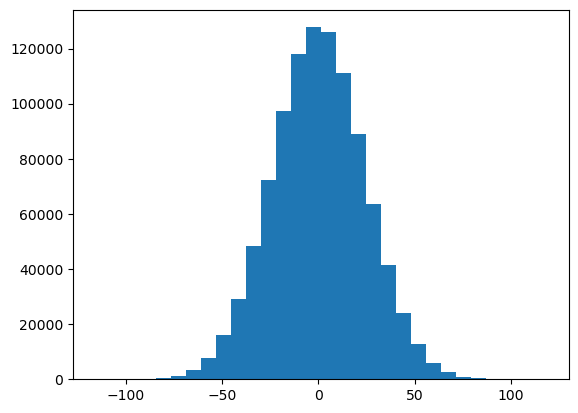

In [11]:
plt.hist(delta_x.flatten(), bins=30)

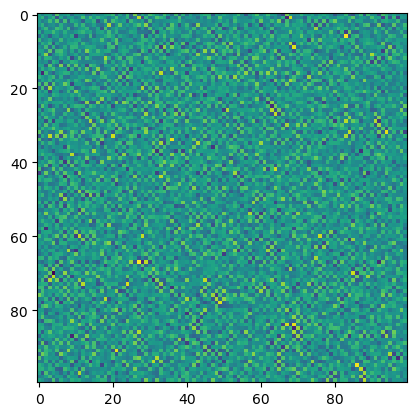

In [12]:
plt.imshow(delta_x[:,:,1])

In [13]:
n_kF = 3

k_bins, pk_meas = get_power_spectrum(delta_x, side, spacing, n_kF=n_kF)

/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


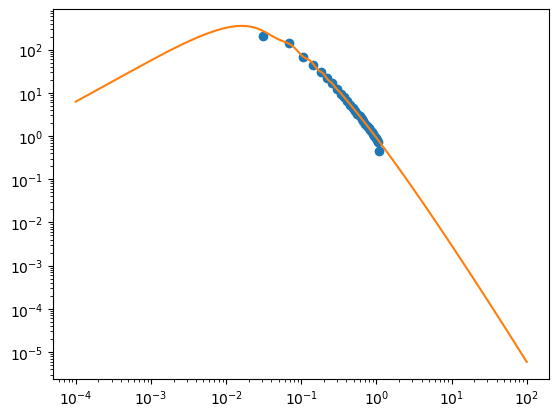

In [14]:
plt.loglog(k_bins, pk_meas, linestyle='', marker='o')
plt.loglog(kh, pk[0])

In [15]:
# generate points

n_mean = 1.e-3
Volume = side**3
N_part = Volume*n_mean

inside each cell of the grid I have no clustering info, because I am below my resolution. 

In [16]:
n_x = n_mean*(1+delta_x)

In [17]:
# number of objects in each cell
Nobj_x = n_x * spacing**3

I use Nobj_x as the mean of a multivariate Poisson distribution, defined on each cell. This gives me the number of observed galaxies in each cell of the grid. This accounts for the mistake I make when sampling the true distribution extracting a random sampling of it with my measures.

In [18]:
Npart = np.random.poisson(Nobj_x)

ValueError: lam < 0 or lam contains NaNs

In [ ]:
## density contrast of the sampled 
delta_N_x = Npart/np.sum(N_part)-1

discretizing the field, that is measuring it on the grid, introduces the shot noise. One wants enough clustering signal not to be dominated by the shot noise

In [ ]:
plt.hist(delta_N_x.flatten(), bins=30)

# 2PCF

In [ ]:
from pyACC.clustering.power_spectrum import count_pairs

In [ ]:
data = np.random.uniform(0,side, (10000,3))

In [ ]:
from scipy.spatial import cKDTree

In [ ]:
tree = cKDTree(data)

In [ ]:
plt.plot(data[:,0], data[:,1], 'o')
plt.plot(data[77,0], data[77,1], color='red', marker='o')
neighbours = tree.query_ball_point(data[77,:], 10)
plt.plot(neighbours[:,0], neighbours[:,1], color='red', marker='o')